In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm
from statsmodels.tsa.api import VAR

sns.set()
plt.rcParams["figure.figsize"] = (18,10)

In [2]:
period = pd.offsets.CustomBusinessDay(weekmask="Mon Tue Wed Thu Fri Sun")
majors = ['eurusd','gbpusd','audusd','nzdusd','usdcad','usdchf','usdjpy']

In [3]:
with open('/Users/orentapiero/Data/Mid5T.pickle', 'rb') as handle:
    Mid = pickle.load(handle)
    
with open('/Users/orentapiero/Data/Bid5T.pickle', 'rb') as handle:
    Bid = pickle.load(handle)

with open('/Users/orentapiero/Data/Ask5T.pickle', 'rb') as handle:
    Ask = pickle.load(handle)
    
majors = ['eurusd','gbpusd','audusd','nzdusd','usdcad','usdchf','usdjpy']

Daily_Open = []
Daily_Close = []

for pair in Mid.keys():
    daily_open = Mid[pair]['open'].resample(period,label = 'right',closed = 'right').first()
    daily_close = Mid[pair]['close'].resample(period,label = 'right',closed = 'right').last()
    daily_open.name,daily_close.name = pair,pair
    
    Daily_Open.append(daily_open)
    Daily_Close.append(daily_close)
    
Daily_Open = pd.concat(Daily_Open, axis = 1)
Daily_Close = pd.concat(Daily_Close, axis = 1)

Daily_Ret = 10000*np.log(Daily_Close/Daily_Open)

In [4]:
def cross_analysis(returns):
    majors = ['eurusd','gbpusd','audusd','nzdusd','usdcad','usdchf','usdjpy']

    usd = {'eur':'eurusd',
           'gbp':'gbpusd',
           'aud':'audusd',
           'nzd':'nzdusd',
           'cad':'usdcad',
           'chf':'usdchf',
           'jpy':'usdjpy'}

    out = []
    for pair in Mid.keys():
        if pair not in majors:
            base = usd[pair[:3]]
            quote = usd[pair[3:]]
            rho = returns[[pair,base,quote]].corr()

            rho_base = rho.loc[pair][base]
            rho_quote = rho.loc[pair][quote]

            if np.abs(rho_base) > np.abs(rho_quote):
                out.append({'pair':pair,'dominant':base,'status':'base'})
            else:
                out.append({'pair':pair,'dominant':quote,'status':'quote'})

    return pd.DataFrame(out)

who_is_dominant = cross_analysis(Daily_Ret.loc['2014'])

array([<AxesSubplot:xlabel='TIMESTAMP'>, <AxesSubplot:xlabel='TIMESTAMP'>,
       <AxesSubplot:xlabel='TIMESTAMP'>, <AxesSubplot:xlabel='TIMESTAMP'>,
       <AxesSubplot:xlabel='TIMESTAMP'>, <AxesSubplot:xlabel='TIMESTAMP'>,
       <AxesSubplot:xlabel='TIMESTAMP'>], dtype=object)

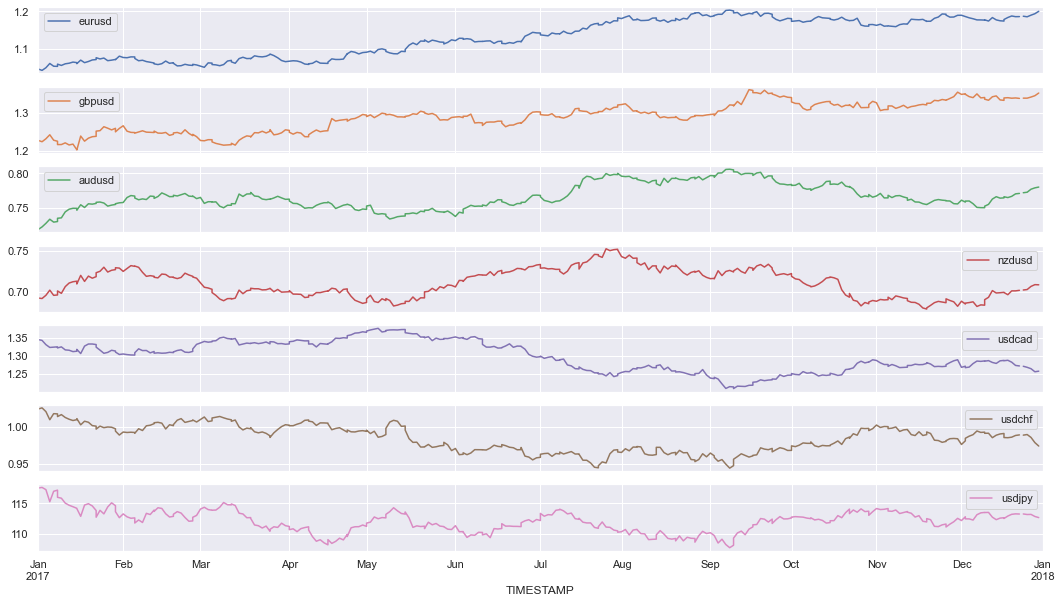

In [6]:
S = Daily_Close[majors]
S.loc['2017'].plot(subplots = True)

In [44]:
def day_of_week_effect(Ret):
    Mu = Ret.groupby(Ret.index.day_name()).mean()
    Mad = Ret.groupby(Ret.index.day_name()).apply(lambda x: x.abs().mean())
    
    Mu = Mu.loc[('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday'),:].copy()
    Mad = Std.loc[('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday'),:].copy()
    
    return Mu,Mad

In [45]:
Ret = 10000*np.log(S).diff()
Ret_train = Ret.loc['2016':'2017']

Mu,Mad = day_of_week_effect(Ret_train)

<AxesSubplot:xlabel='TIMESTAMP'>

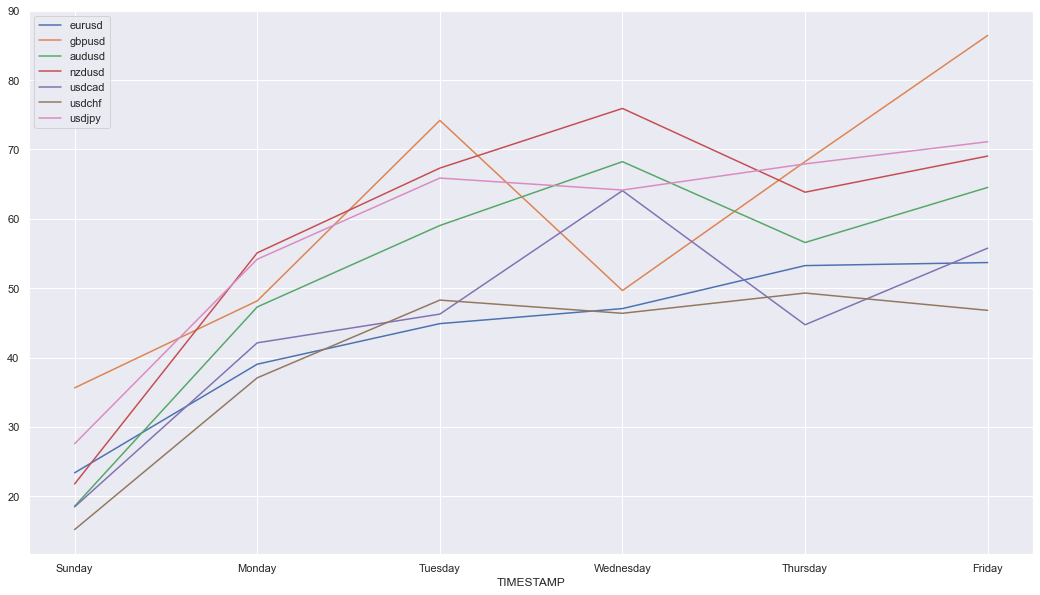

In [46]:
Mad.plot()


In [20]:
pairs = ['eurusd','gbpusd','audusd','nzdusd','usdcad','usdchf','usdjpy']

N = len(Daily_Ret)

Sum = []
Mean = []
Max = []
Min = []

L = 252
for i in tqdm(range(L,N-L)):
    try:
        y = Daily_Ret[pairs].iloc[i-L:i]
        model = VAR(y)
        results = model.fit(maxlags = 1)

        summation = pd.DataFrame(results.forecast(y.values,6),columns = y.columns).sum()
        average = pd.DataFrame(results.forecast(y.values,6),columns = y.columns).mean()
        maximization = pd.DataFrame(results.forecast(y.values,6),columns = y.columns).max()
        minimization = pd.DataFrame(results.forecast(y.values,6),columns = y.columns).min()

        summation.name = y.index[-1].strftime('%Y-%m-%d')
        average.name = y.index[-1].strftime('%Y-%m-%d')
        maximization.name = y.index[-1].strftime('%Y-%m-%d')
        minimization.name = y.index[-1].strftime('%Y-%m-%d')

        Sum.append(summation)
        Mean.append(average)
        Max.append(maximization)
        Min.append(minimization)
    except:
        pass


 37%|██████████████▎                        | 666/1817 [00:00<00:01, 953.27it/s]

 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number 

 56%|█████████████████████▏                | 1012/1817 [00:01<00:00, 993.14it/s]

 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number 

 70%|█████████████████████████▊           | 1268/1817 [00:01<00:00, 1127.56it/s]

 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number 

100%|██████████████████████████████████████| 1817/1817 [00:02<00:00, 836.76it/s]


In [ ]:
Sum = pd.concat(Sum,axis = 1).T
Mean = pd.concat(Mean,axis = 1).T
Max = pd.concat(Max,axis = 1).T
Min = pd.concat(Min,axis = 1).T

In [ ]:
Max.max()